In [1]:
import json
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)

In [2]:
with open("data/poker-game-tree.json", "r") as f:
    poker = json.load(f)
with open("data/schieber-jass-game-tree.json", "r") as f:
    jass = json.load(f)

In [3]:
sample_size = 100

dfs_poker = np.array(poker['dfs'])
np.random.shuffle(dfs_poker)
lcs_poker = np.array(poker['lcs'])
np.random.shuffle(lcs_poker)
bs_poker = np.array(poker['bs'])
np.random.shuffle(bs_poker)

dfs_poker = dfs_poker.reshape(-1, sample_size).mean(axis=-1)
lcs_poker = lcs_poker.reshape(-1, sample_size).mean(axis=-1)
bs_poker = bs_poker.reshape(-1, sample_size).mean(axis=-1)


dfs_jass = np.array(jass['dfs'])
np.random.shuffle(dfs_jass)
lcs_jass = np.array(jass['lcs'])
np.random.shuffle(lcs_jass)
bs_jass = np.array(jass['bs'])
np.random.shuffle(bs_jass)

dfs_jass = dfs_jass.reshape(-1, sample_size).mean(axis=-1)
lcs_jass = lcs_jass.reshape(-1, sample_size).mean(axis=-1)
bs_jass = bs_jass.reshape(-1, sample_size).mean(axis=-1)

In [4]:
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('gist_rainbow')(range(ncolors))
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
map_object = LinearSegmentedColormap.from_list(name='gist_rainbow_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)
color_array = plt.get_cmap('rainbow')(range(ncolors))
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)

# register this new colormap with matplotlib

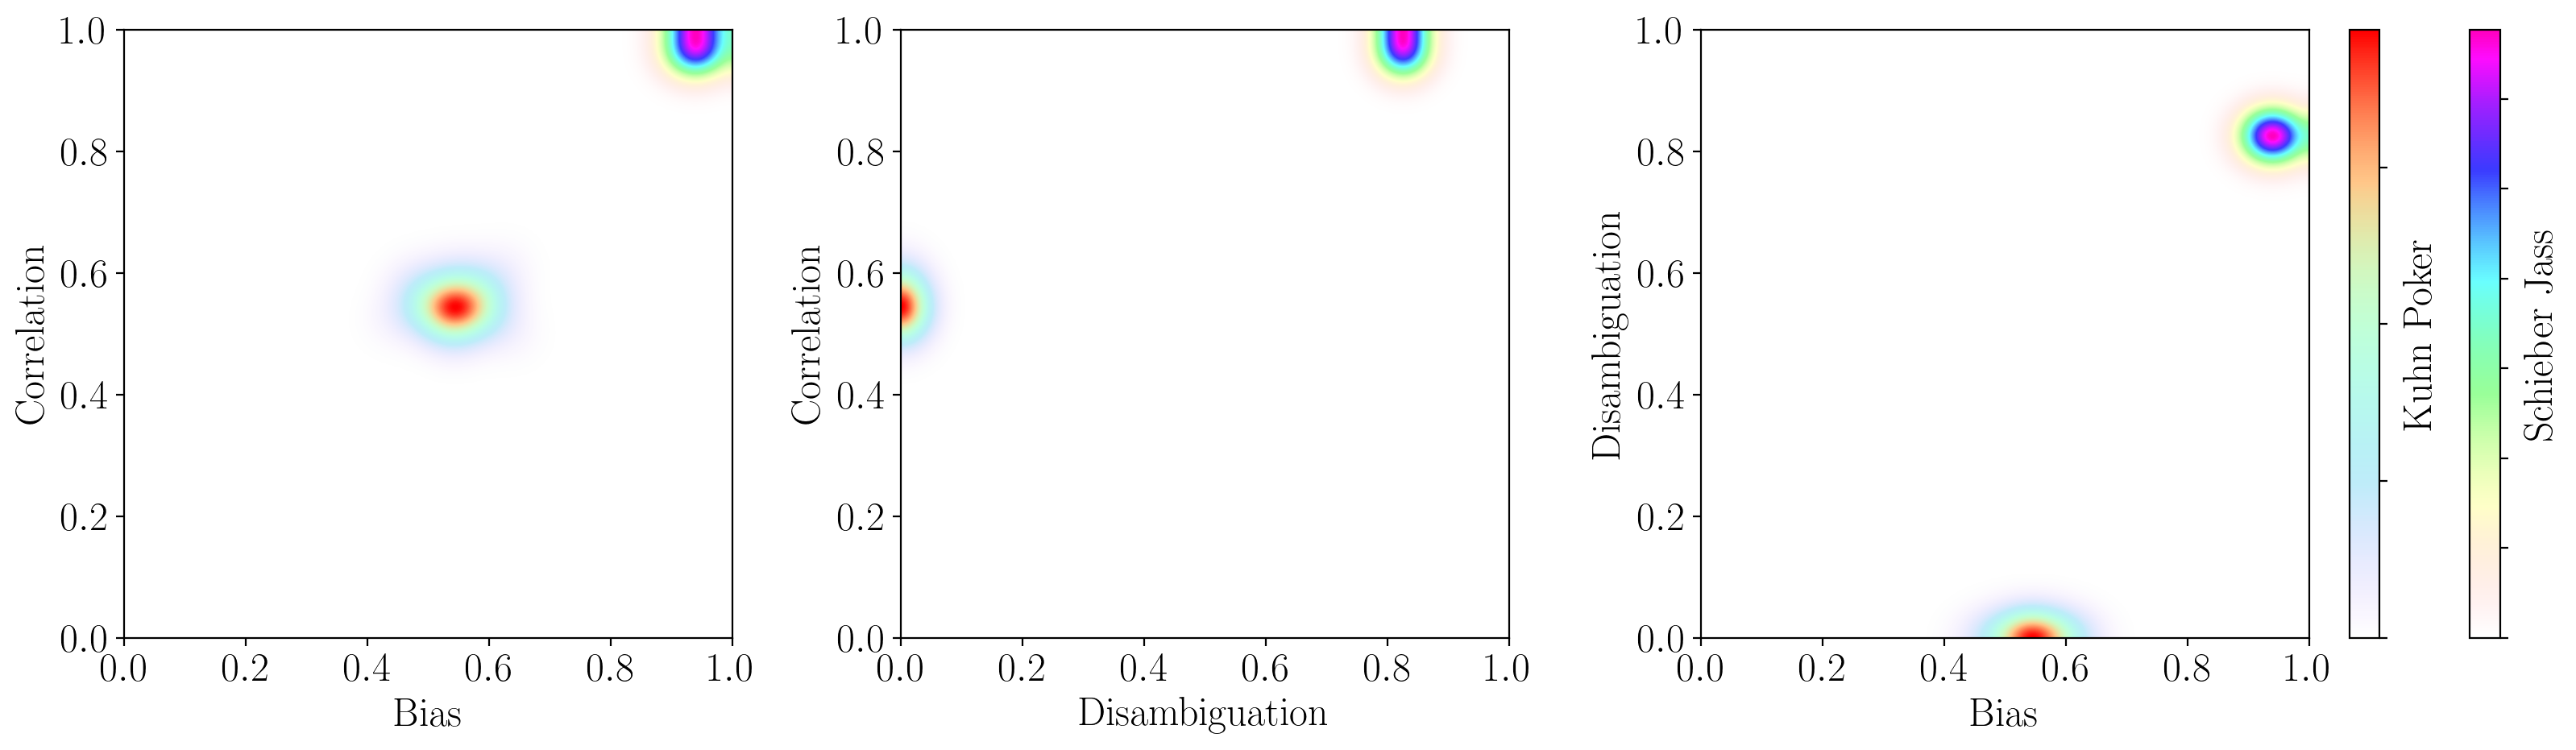

In [5]:
norm = lambda x: (x - x.min()) / (x.max() - x.min())

fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200, gridspec_kw={'width_ratios': [1, 1, 1.5]})

s = 32

heatmap, xedges, yedges = np.histogram2d(bs_poker, lcs_poker, range=[[0, 1],[0, 1]], bins=1000)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
poker_heatmap = gaussian_filter(heatmap, sigma=s)

heatmap, xedges, yedges = np.histogram2d(bs_jass, lcs_jass, range=[[0, 1],[0, 1]], bins=1000)
jass_heatmap = gaussian_filter(heatmap, sigma=s)

axes[0].imshow(jass_heatmap.T, extent=extent, origin="lower", cmap='gist_rainbow_alpha')
axes[0].imshow(poker_heatmap.T, extent=extent, origin="lower", cmap='rainbow_alpha')

axes[0].set_xlabel("Bias")
axes[0].set_ylabel("Correlation")

heatmap, xedges, yedges = np.histogram2d(dfs_poker, lcs_poker, range=[[0, 1],[0, 1]], bins=1000)
poker_heatmap = gaussian_filter(heatmap, sigma=s)

heatmap, xedges, yedges = np.histogram2d(dfs_jass, lcs_jass, range=[[0, 1],[0, 1]], bins=1000)
jass_heatmap = gaussian_filter(heatmap, sigma=s)

axes[1].imshow(jass_heatmap.T, extent=extent, origin="lower", cmap='gist_rainbow_alpha')
axes[1].imshow(poker_heatmap.T, extent=extent, origin="lower", cmap='rainbow_alpha')

axes[1].set_xlabel("Disambiguation")
axes[1].set_ylabel("Correlation")

heatmap, xedges, yedges = np.histogram2d(bs_poker, dfs_poker, range=[[0, 1],[0, 1]], bins=1000)
poker_heatmap = gaussian_filter(heatmap, sigma=s)

heatmap, xedges, yedges = np.histogram2d(bs_jass, dfs_jass, range=[[0, 1],[0, 1]], bins=1000)
jass_heatmap = gaussian_filter(heatmap, sigma=s)

clb1 = axes[2].imshow(jass_heatmap.T, extent=extent, origin="lower", cmap='gist_rainbow_alpha')
clb2 = axes[2].imshow(poker_heatmap.T, extent=extent, origin="lower", cmap='rainbow_alpha')

cb = plt.colorbar(clb1, shrink=1, pad=0.0)
cb.set_label("Schieber Jass"), cb.set_ticklabels([])
cb = plt.colorbar(clb2, shrink=1, pad=.05)
cb.set_label("Kuhn Poker"), cb.set_ticklabels([])

axes[2].set_xlabel("Bias")
axes[2].set_ylabel("Disambiguation")
plt.show()